In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mastcasjobs
import pyvo

In [3]:
query = """SELECT o.objID, o.raMean, o.decMean, o.ndetections,
        o.ng, o.nr, o.ni, o.nz, o.ny, o.gMeanPSFMag, 
        o.rMeanPSFMag,o.iMeanPSFMag,o.zMeanPSFMag,o.yMeanPSFMag
        FROM fGetNearbyObjEq(187.706, 12.391, 500.0/60.0) AS nb
        INNER JOIN MeanObjectView As o ON o.objID = nb.objID
        WHERE o.ng > 0 AND o.nr > 0 AND o.ni > 0 AND o.nz > 0 AND o.ny > 0
        """

jobs = mastcasjobs.MastCasJobs(username = "vibin.narayanan", password = "vibinps1pwd", context = "PanSTARRS_DR2")
results = jobs.quick(query, task_name = "python API trial")

In [26]:
data = results.columns[1,2,9,10]
xvalues = data[1]

In [27]:
xvalues = data[0] - np.average(data[0])
yvalues = data[1] - np.average(data[1])
gMeanPSFMag = data[2]
rMeanPSFMag = data[3]

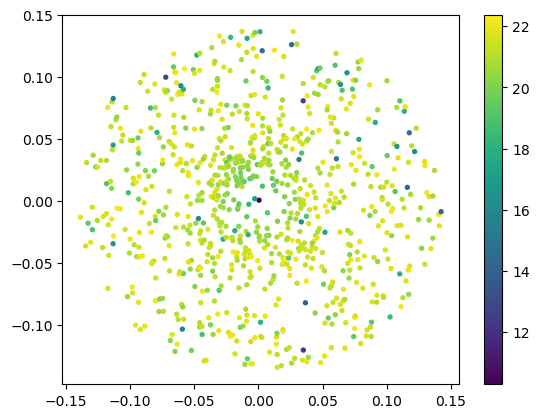

In [28]:
plt.scatter(xvalues, yvalues, s = 8, c = gMeanPSFMag)
plt.colorbar()

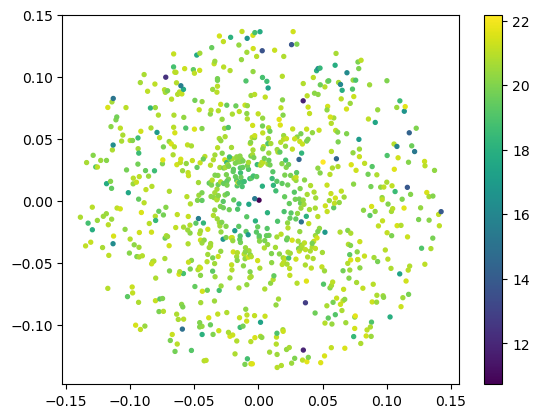

In [29]:
right_pos = np.where(rMeanPSFMag != -999)
plt.scatter(xvalues[right_pos], yvalues[right_pos], s = 8, c = rMeanPSFMag[right_pos])
plt.colorbar()